# Advanced CSS in Dash
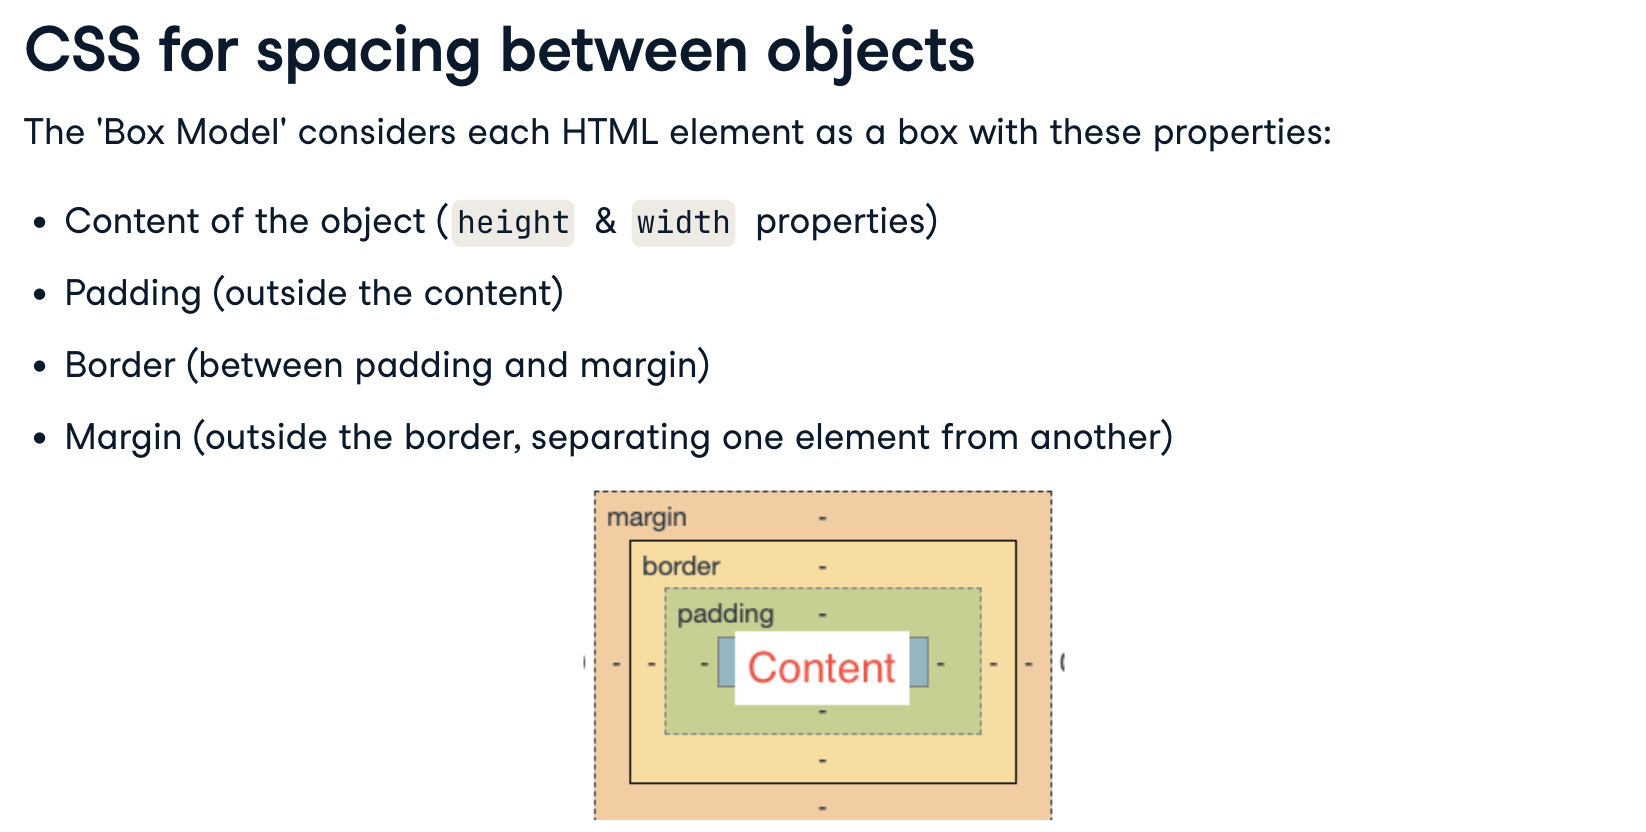

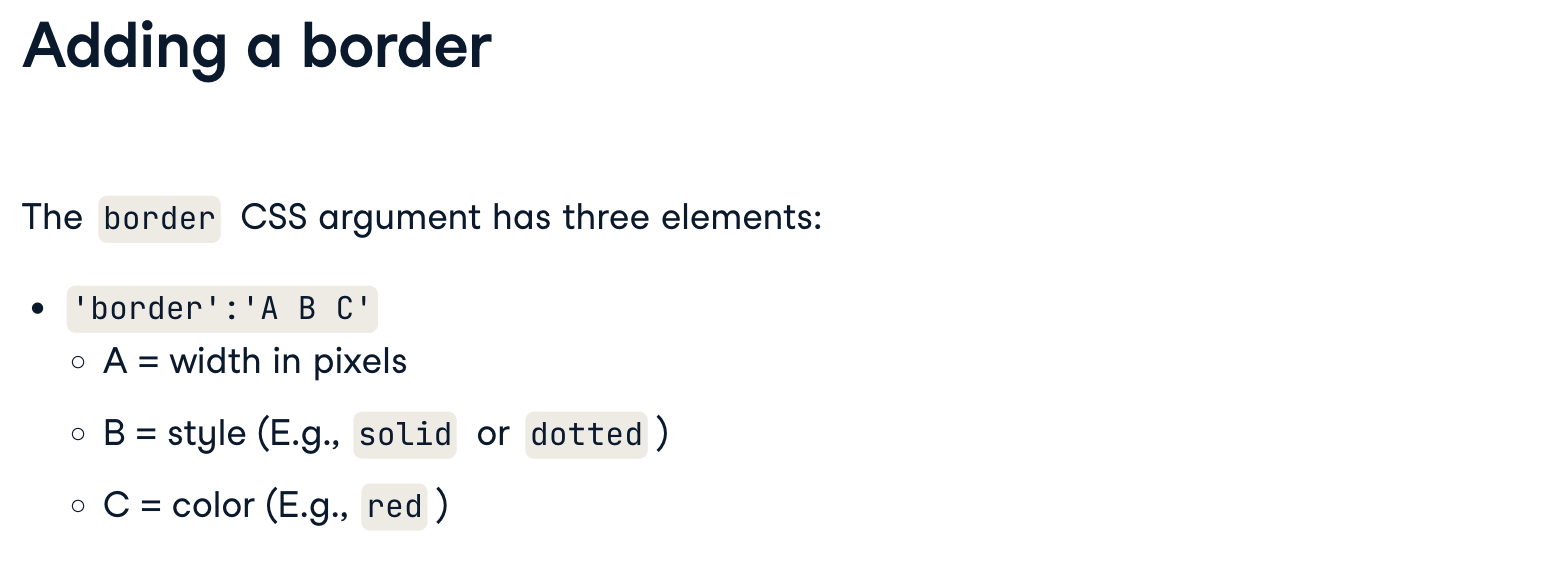

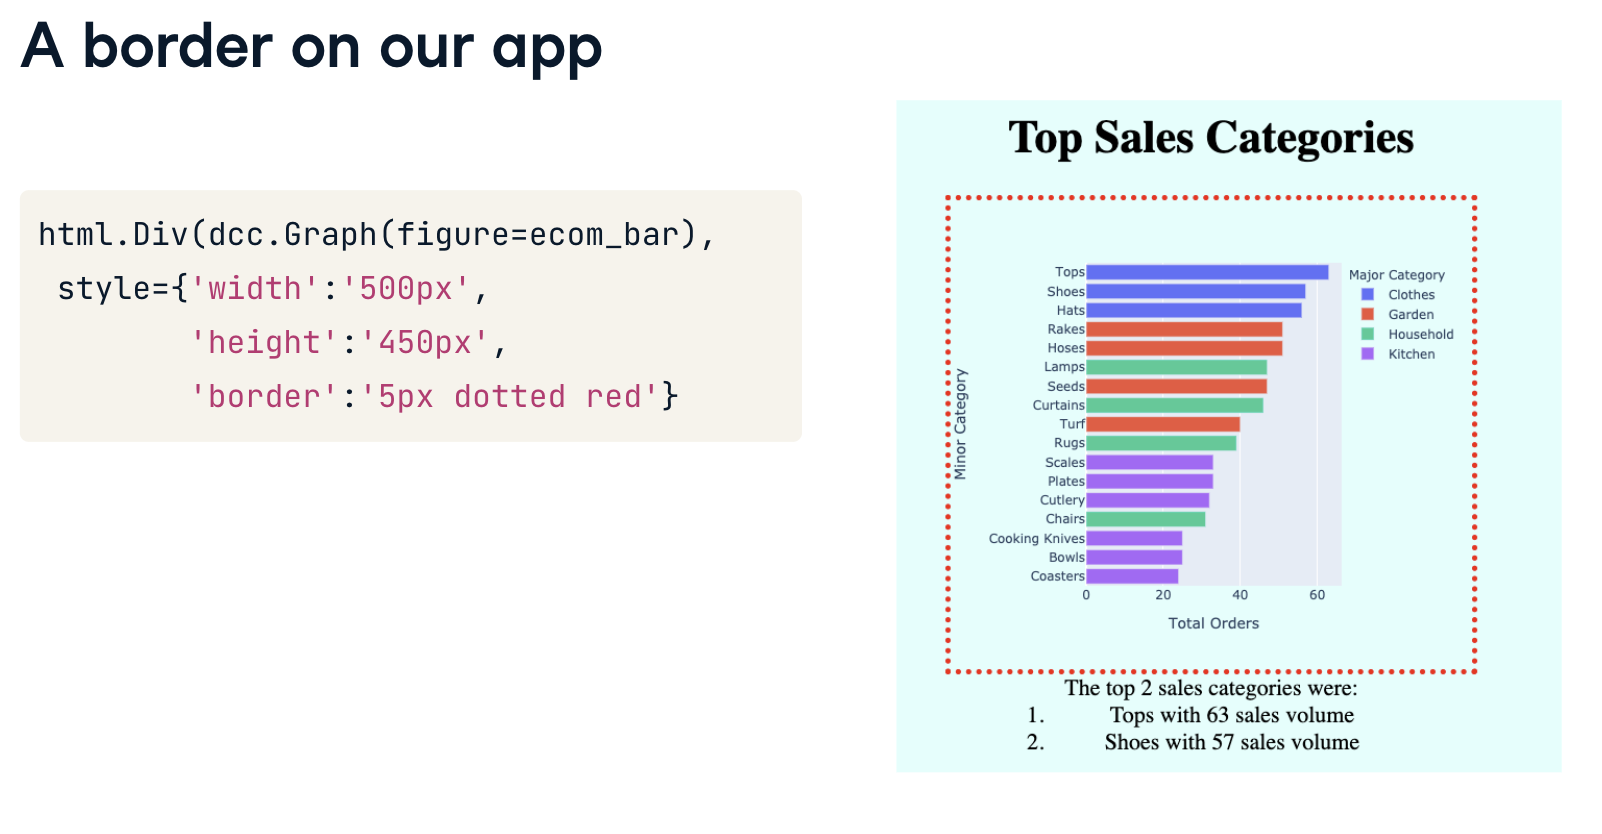

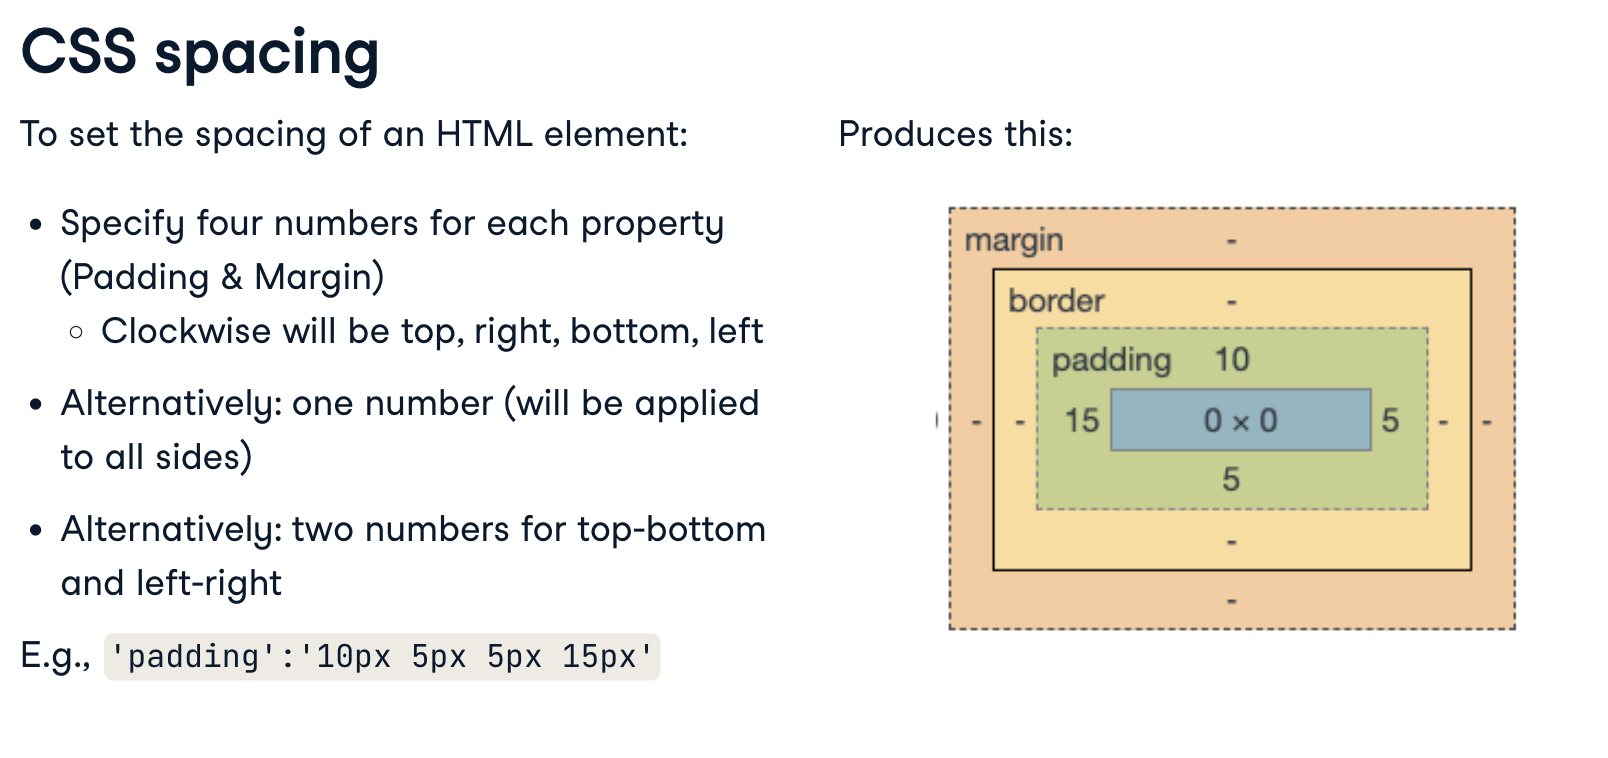

- Adding padding add extra spcae inside the border
- Adding margin add extra spcae outside the border

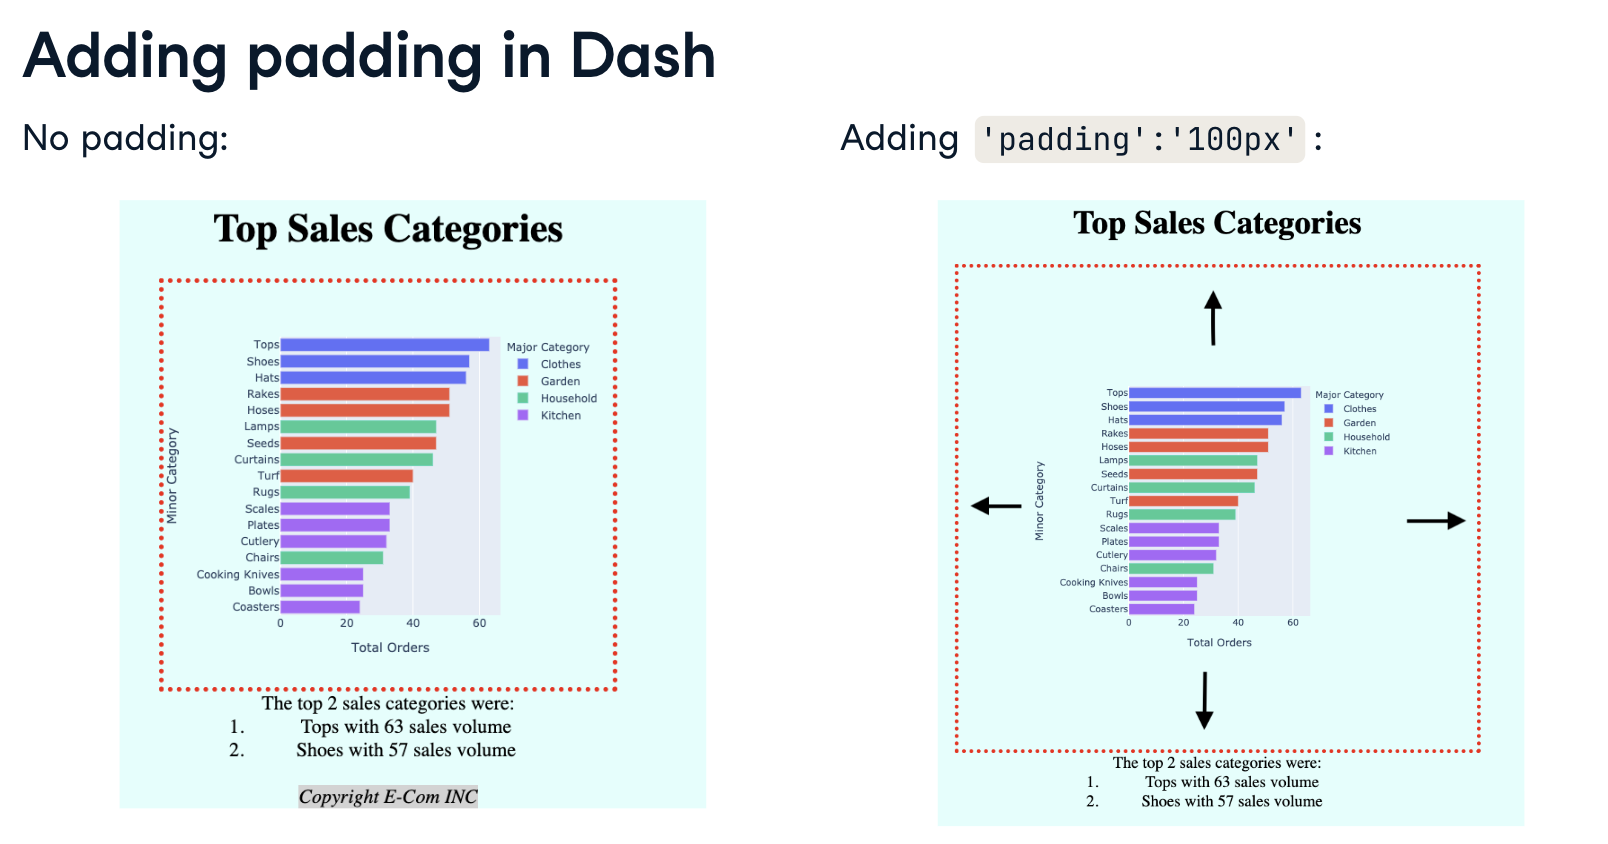

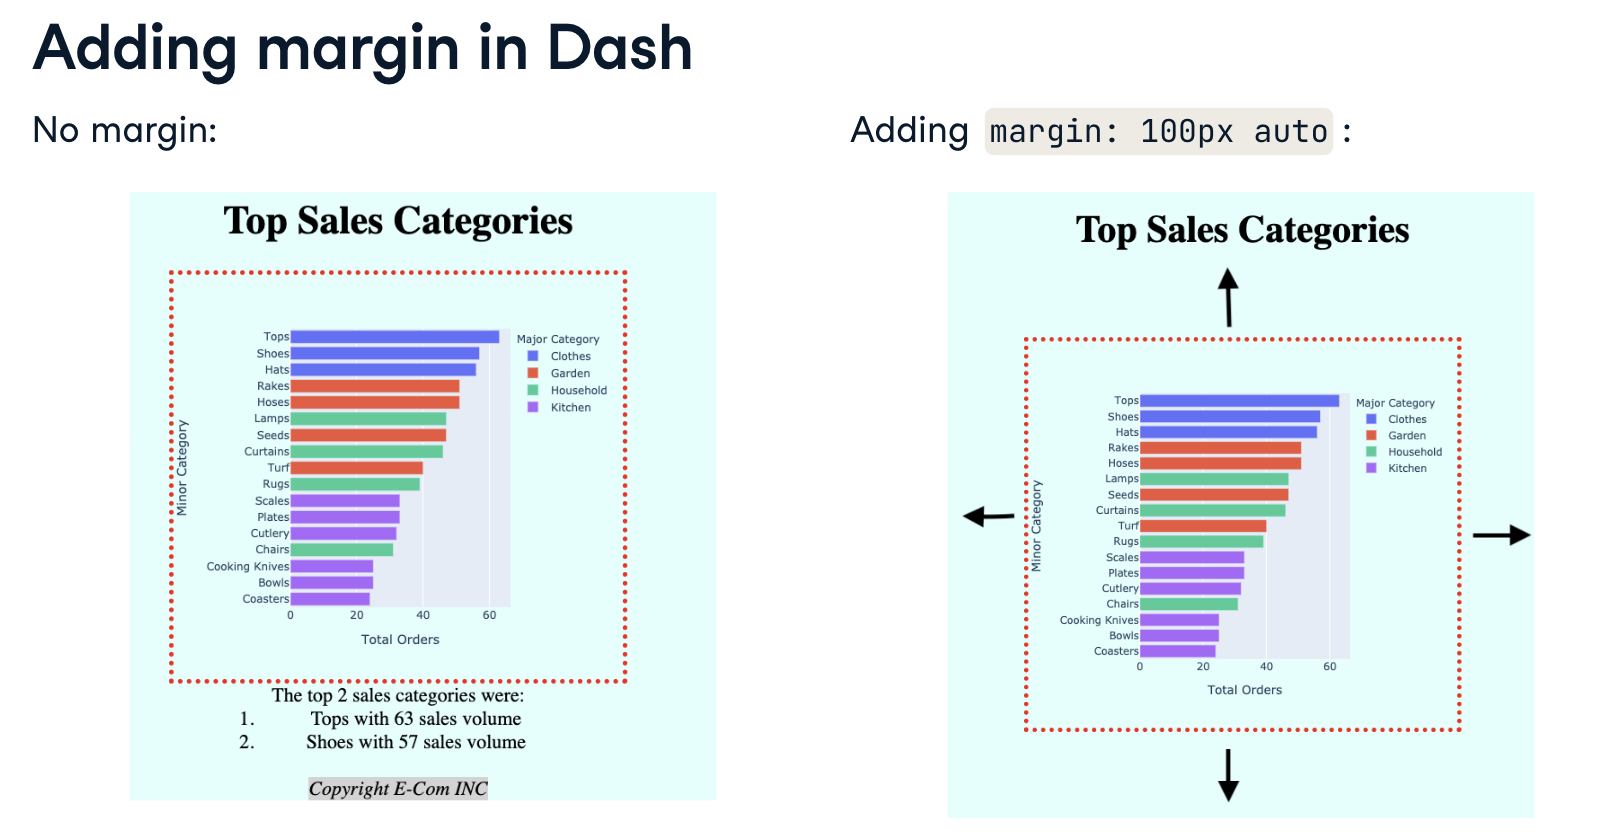

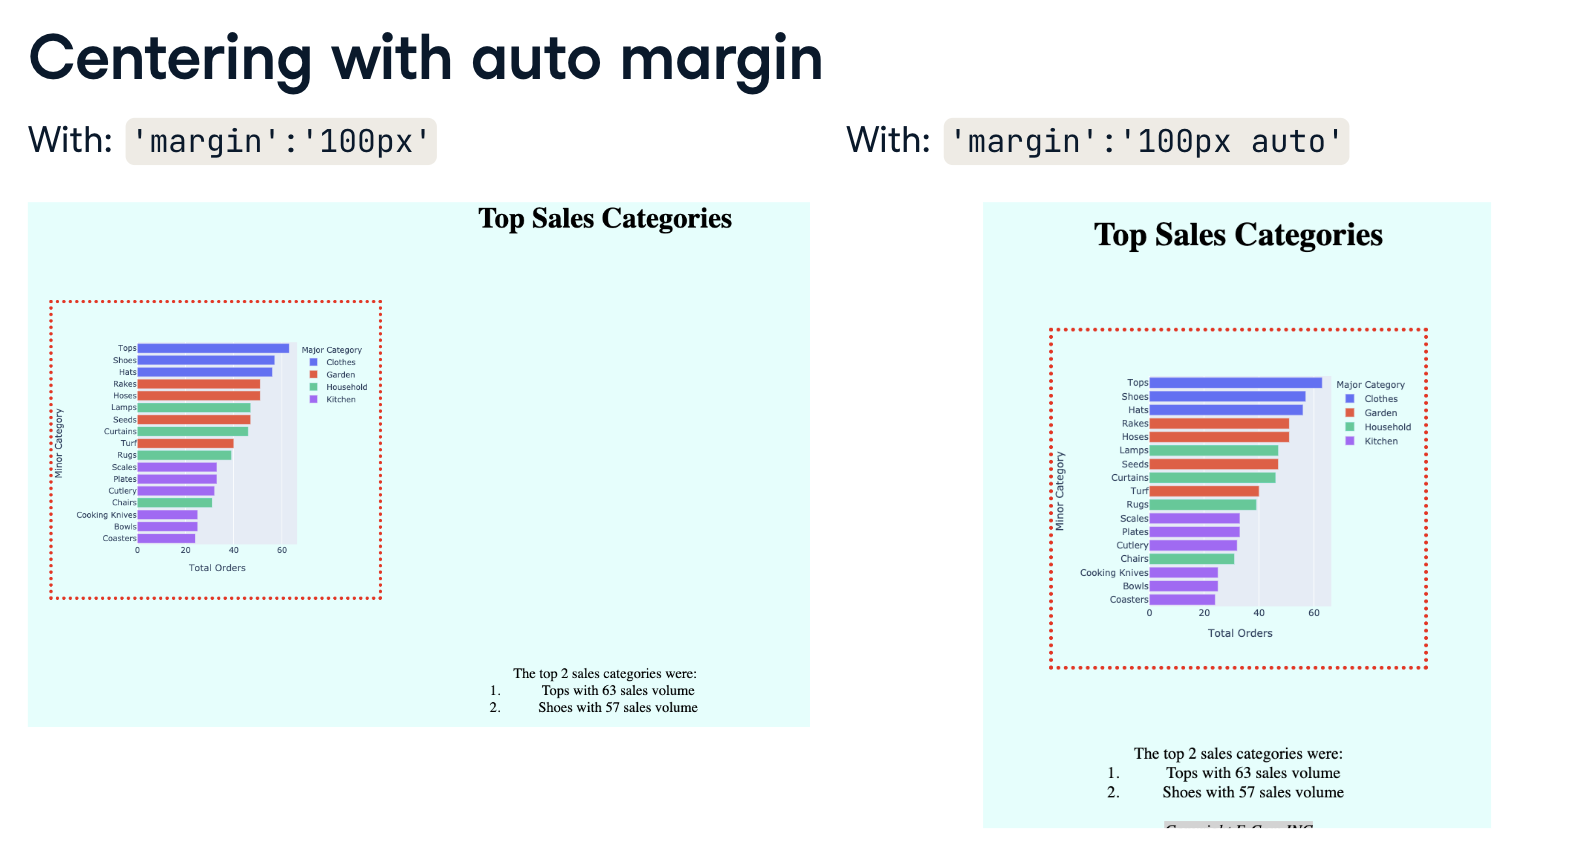

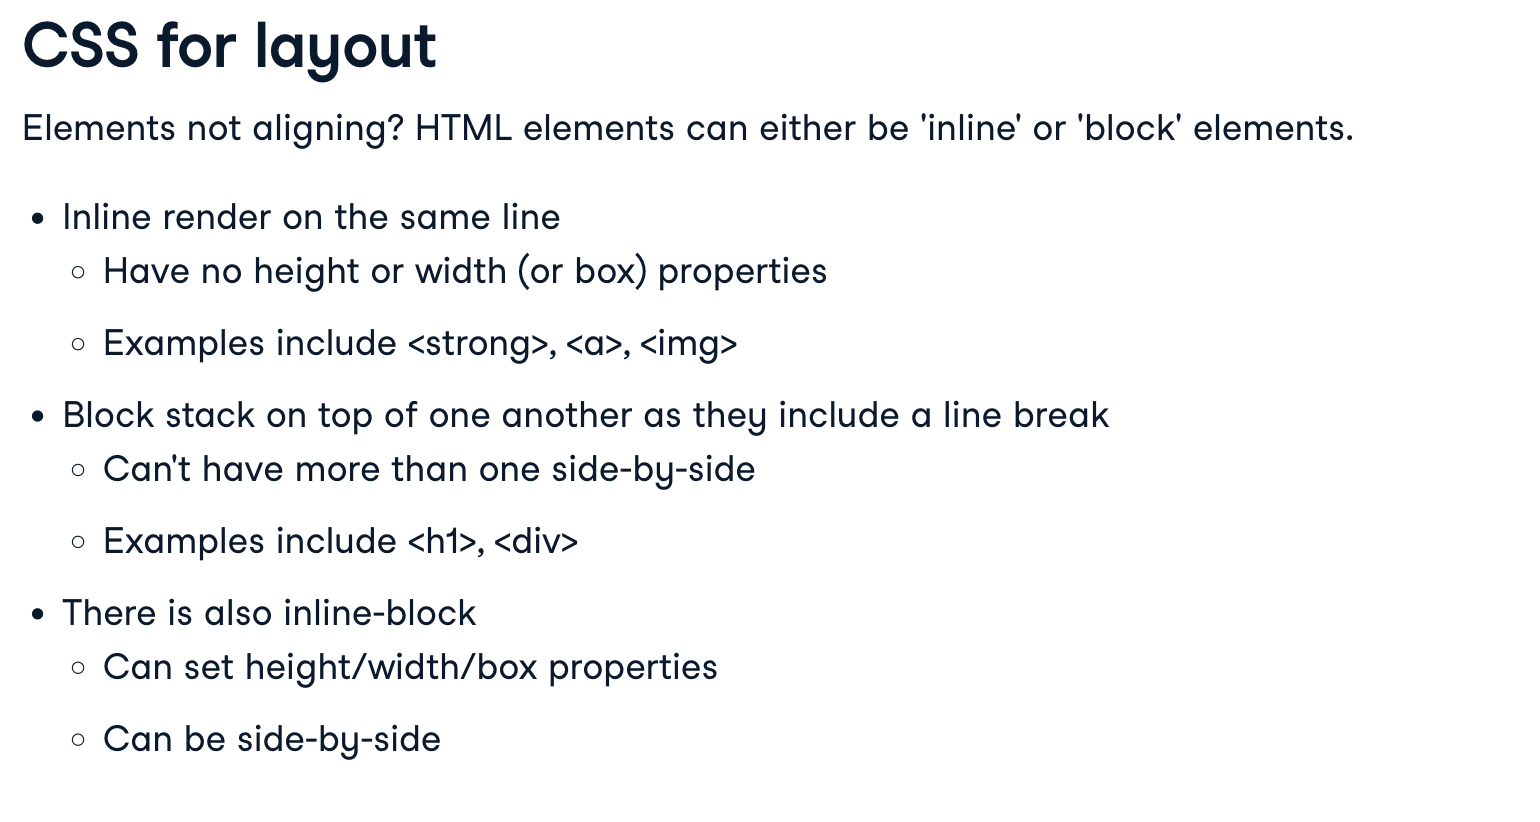

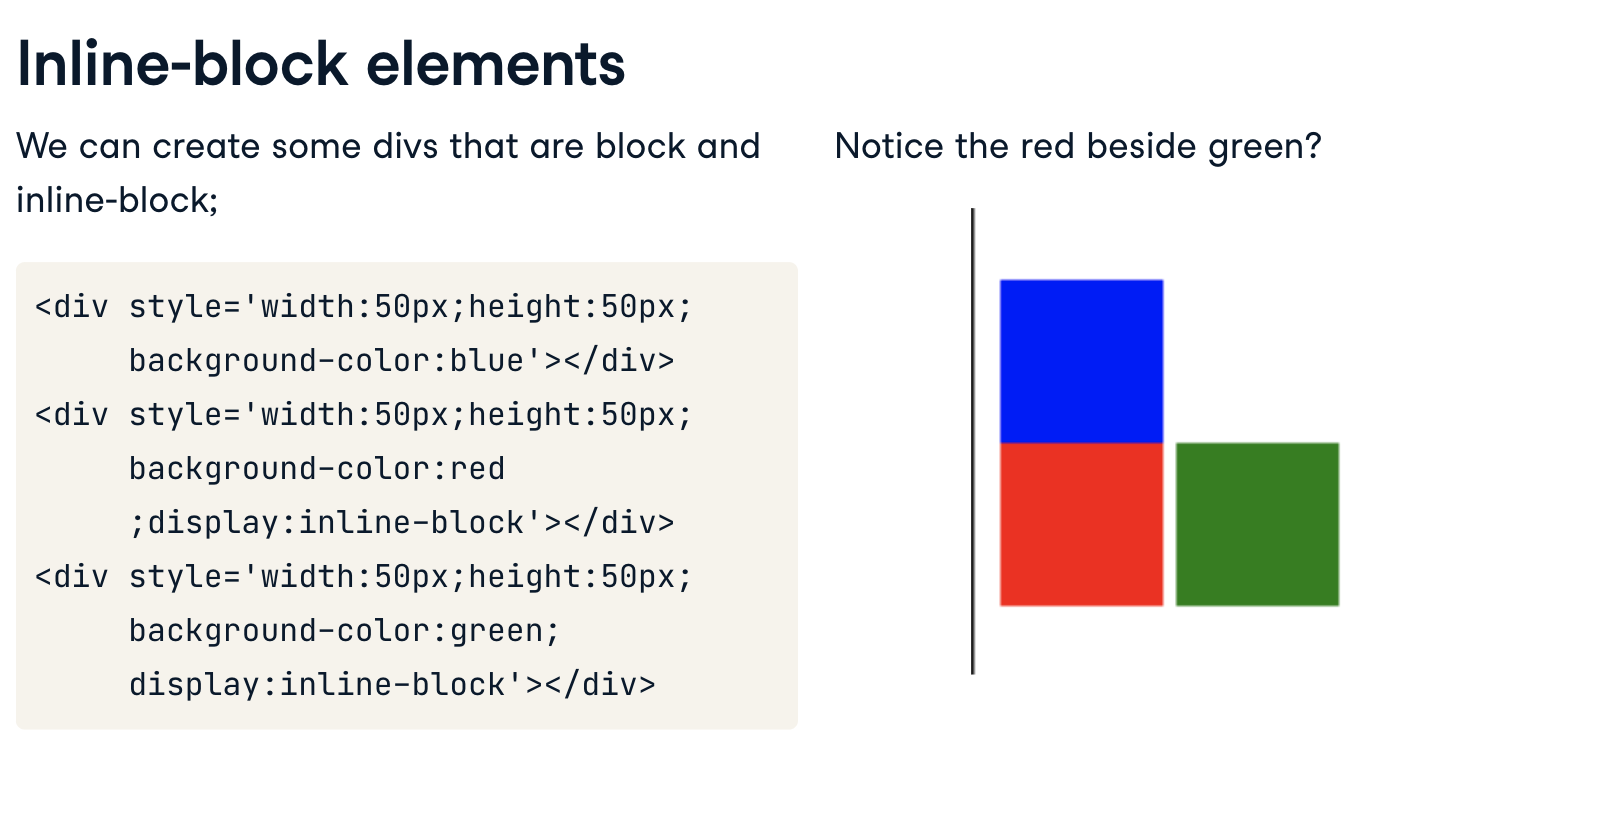

## Exercice
A refined sales dashboard
The e-commerce company from Chapter 1 has called you up and has a budget for you to extend the previous work you did, building a basic proof-of-concept sales dashboard.

Now that you have built your skills in styling and positioning, you can really make this dashboard presentation-worthy.

As a reminder, the company would like a line chart of their total sales each month, a bar chart of their total sales in each country, and a high-level summary statistic around the highest order quantity for the period. However, they would prefer these side-by-side, and their corporate style guide asks for light blue backgrounds. They have requested for there to be two logos, one on either side of the main title, so their brand is nice and prominent.

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
import random

# Creating a sample 'ecom_sales' DataFrame
data = {
    'Year-Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000],
    'Country': ['United Kingdom', 'Germany', 'France', 'Australia', 'Canada'],
    'Quantity': [120, 150, 90, 80, 110]
}

# Create the ecom_sales DataFrame
ecom_sales = pd.DataFrame(data)

logo_link = 'logo.png'

ecom_line = ecom_sales.groupby('Year-Month')['OrderValue'].agg('sum').reset_index(name='TotalSales')
line_fig = px.line(data_frame=ecom_line, x='Year-Month', y='TotalSales',title='Total Sales by Month')
line_fig.update_layout({'paper_bgcolor':'rgb(224, 255, 252)' }) 
ecom_bar = ecom_sales.groupby('Country')['OrderValue'].agg('sum').reset_index(name='TotalSales')
bar_fig = px.bar(data_frame=ecom_bar, x='TotalSales', y='Country', orientation='h',title='Total Sales by Country')
bar_fig.update_layout({'yaxis':{'dtick':1, 'categoryorder':'total ascending'}, 'paper_bgcolor':'rgb(224, 255, 252)'}) 

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.Div(children=[
      html.Img(src=logo_link, 
               # Place the logo side-by-side the H1 with required margin
               style={'display':'inline-block', 'margin':'25px'}),
      html.H1(children=['Sales Figures'],
              # Make the H1 side-by-side with the logos
              style={'display':'inline-block'}), 
      html.Img(src=logo_link,
               # Place the logo side-by-side the H1 with required margin
               style={'display':'inline-block', 'margin':'25px'})]),
    html.Div(
        dcc.Graph(figure=line_fig), 
        # Ensure graphs are correct size, side-by-side with required margin
        style={'width':'500px', 'display':'inline-block', 'margin':'5px'}), 
    html.Div(
      	dcc.Graph(figure=bar_fig),
        # Ensure graphs are correct size, side-by-side with required margin
    	style={'width':'350px', 'display':'inline-block', 'margin':'5px'}), 
    html.H3(f'The largest order quantity was {ecom_sales.Quantity.max()}')
    ],style={'text-align':'center', 'font-size':22, 'background-color':'rgb(224, 255, 252)'})

if __name__ == '__main__':
    app.run_server(port=60302, debug=True)

## Ecercice 2
### Controlling object layout
Your work with Dash is really having an impact in your organization. However, a colleague has contacted you about an issue they are having with one of their dashboards. Their envisioned dashboard has the company logo up the top, followed by two bar charts next to each other.

But the logo is too close to the top, and the graphs are stacked on top of each other. What a mess!

You think you can use your knowledge of CSS to help wrangle these objects into place.

In [4]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

logo_link = 'logo.png'
ecom_bar_major_cat = ecom_sales.groupby('Major Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')
ecom_bar_minor_cat = ecom_sales.groupby('Minor Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')
bar_fig_major_cat = px.bar(ecom_bar_major_cat, x='Total Sales ($)', y='Major Category', color='Major Category', color_discrete_map={'Clothes':'blue','Kitchen':'red','Garden':'green','Household':'yellow'})
bar_fig_minor_cat = px.bar(ecom_bar_minor_cat, x='Total Sales ($)', y='Minor Category')                       

app = dash.Dash(__name__)

app.layout = html.Div([
  html.Img(src=logo_link,
        # Add margin to the logo
        style={'margin':'30px 0px 0px 0px'}),
  html.H1('Sales breakdowns'),
  html.Div(children=[
      dcc.Graph(
        # Style the graphs to appear side-by-side
        figure=bar_fig_major_cat,
        style={'display':'inline-block'}),
      dcc.Graph(
        figure=bar_fig_minor_cat,
        style={'display':'inline-block'}),
  ]),
  html.H2('Major Category',
        # Style the titles to appear side-by-side with a 2 pixel border
        style={'display':'inline-block', 'border':'2px solid black',
        # Style the titles to have the correct spacings
               'padding':'10px', 'margin':'10px 220px'}),
  html.H2('Minor Category',
        # Style the titles to appear side-by-side with a 2 pixel border
        style={'display':'inline-block', 'border':'2px solid black',
        # Style the titles to have the correct spacings
               'padding':'10px', 'margin':'10px 220px'}),
  
  ], style={'text-align':'center', 'font-size':22})

if __name__ == '__main__':
    app.run_server(port=60303, debug=True)

KeyError: 'Major Category'